In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 100000
xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs -5*zs + 7 + noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)


In [3]:
training_data = np.load("C:/Users/LENOVO/Desktop/Data Science Course/TF_intro.npz")

In [4]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1))#takes the inputs provided to the model and calculates the dot product of input and weights and adds bias
])#stack layers ,specifies how we lay down our model
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer=custom_optimizer,loss='huber_loss') #configure model

model.fit(training_data['inputs'],training_data['targets'],epochs =100,verbose=2) # iteration over full dataset -> Epoch
#verbose = 0 , means stay silent 

Train on 100000 samples
Epoch 1/100
100000/100000 - 4s - loss: 8.4557
Epoch 2/100
100000/100000 - 5s - loss: 2.6384
Epoch 3/100
100000/100000 - 4s - loss: 0.3969
Epoch 4/100
100000/100000 - 4s - loss: 0.1678
Epoch 5/100
100000/100000 - 5s - loss: 0.1667
Epoch 6/100
100000/100000 - 5s - loss: 0.1666
Epoch 7/100
100000/100000 - 4s - loss: 0.1666
Epoch 8/100
100000/100000 - 4s - loss: 0.1667
Epoch 9/100
100000/100000 - 4s - loss: 0.1667
Epoch 10/100
100000/100000 - 5s - loss: 0.1666
Epoch 11/100
100000/100000 - 5s - loss: 0.1666
Epoch 12/100
100000/100000 - 4s - loss: 0.1667
Epoch 13/100
100000/100000 - 5s - loss: 0.1667
Epoch 14/100
100000/100000 - 5s - loss: 0.1666
Epoch 15/100
100000/100000 - 4s - loss: 0.1667
Epoch 16/100
100000/100000 - 4s - loss: 0.1667
Epoch 17/100
100000/100000 - 4s - loss: 0.1667
Epoch 18/100
100000/100000 - 4s - loss: 0.1667
Epoch 19/100
100000/100000 - 5s - loss: 0.1667
Epoch 20/100
100000/100000 - 4s - loss: 0.1667
Epoch 21/100
100000/100000 - 4s - loss: 0.166

# extract weights and bias


In [5]:
weights =model.layers[0].get_weights()[0]
bias =model.layers[0].get_weights()[1]

In [6]:
predictions=model.predict_on_batch(training_data['inputs'])
predictions_rounded = np.round(predictions,1)
predictions_rounded

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


array([[ 47.2],
       [ 15. ],
       [-32.7],
       ...,
       [  1.4],
       [ 62.3],
       [-28.1]], dtype=float32)

In [7]:
np.round(training_data['targets'])

array([[ 48.],
       [ 15.],
       [-33.],
       ...,
       [  1.],
       [ 63.],
       [-27.]])

## plotting the outputs vs target


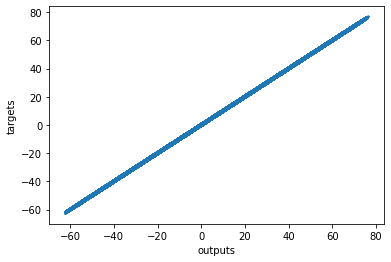

In [8]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()